In [1]:
import pandas as pd

df= pd.read_csv("Korea_Stocks_Kospi.csv", index_col=0) 
df.head()

,name,adj_close,open,high,low,close,differ,avg,volume,date,year,month,day,dayofweek
0,70,74031,84000,84000,79000,82300,1700,2500.0,71250,2011-12-05,2011,12,5,0
1,70,72322,81000,82000,72900,80400,600,4550.0,75973,2011-12-06,2011,12,6,1
2,70,75381,80500,85800,78300,83800,-3300,3750.0,70873,2011-12-07,2011,12,7,2
3,70,71063,83000,83800,78600,79000,4000,2600.0,77794,2011-12-08,2011,12,8,3
4,70,68184,77500,77500,75200,75800,1700,1150.0,54451,2011-12-09,2011,12,9,4


In [2]:
#용량 줄이는 코드
import numpy as np

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    return df
df = reduce_mem_usage(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807311 entries, 0 to 807310
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   name       807311 non-null  int32  
 1   adj_close  807311 non-null  int32  
 2   open       807311 non-null  int32  
 3   high       807311 non-null  int32  
 4   low        807311 non-null  int32  
 5   close      807311 non-null  int32  
 6   differ     807311 non-null  int32  
 7   avg        807311 non-null  float32
 8   volume     807311 non-null  int64  
 9   date       807311 non-null  object 
 10  year       807311 non-null  int16  
 11  month      807311 non-null  int8   
 12  day        807311 non-null  int8   
 13  dayofweek  807311 non-null  int8   
dtypes: float32(1), int16(1), int32(7), int64(1), int8(3), object(1)
memory usage: 47.0+ MB


## 데이터 변환

In [3]:
dfdf=df[["name", "adj_close", "date"]]
dfdf

,name,adj_close,date
0,70,74031,2011-12-05
1,70,72322,2011-12-06
2,70,75381,2011-12-07
3,70,71063,2011-12-08
4,70,68184,2011-12-09
...,...,...,...
807306,316140,10300,2021-04-09
807307,316140,10400,2021-04-12
807308,316140,10350,2021-04-13
807309,316140,10400,2021-04-14


In [4]:
new_df = dfdf.pivot_table('adj_close', index = 'date', columns='name').fillna(0)
new_df

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,0.0,3338.0,23510.0,0.0,20558.0,9641.0,35.0,6111.0,0.0,307182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,0.0,3097.0,23074.0,0.0,20789.0,8941.0,33.0,5778.0,0.0,275569.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,0.0,3105.0,21562.0,0.0,19557.0,8475.0,31.0,5529.0,0.0,261254.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-07,0.0,2957.0,22570.0,0.0,19980.0,8630.0,32.0,5404.0,0.0,258868.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-10,0.0,3179.0,22738.0,0.0,19826.0,8552.0,35.0,5653.0,0.0,256482.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,91300.0,36200.0,65800.0,178000.0,49500.0,84800.0,18450.0,84300.0,117000.0,137500.0,...,41150.0,19250.0,140000.0,56600.0,127500.0,163500.0,41950.0,263500.0,28450.0,10400.0
2021-04-13,91500.0,36100.0,65900.0,175000.0,49250.0,85200.0,18700.0,85500.0,114500.0,139500.0,...,41450.0,18550.0,138500.0,58700.0,127500.0,162000.0,42400.0,256797.0,27950.0,10350.0
2021-04-14,92700.0,35550.0,64600.0,176000.0,49900.0,89600.0,19000.0,86000.0,118000.0,137000.0,...,41550.0,18250.0,141500.0,59400.0,127500.0,162500.0,43900.0,277000.0,28500.0,10400.0


In [5]:
new_df_T = new_df.T
new_df_T

date,2000-01-04,2000-01-05,2000-01-06,2000-01-07,2000-01-10,2000-01-11,2000-01-12,2000-01-13,2000-01-14,2000-01-17,...,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-12,2021-04-13,2021-04-14,2021-04-15,2021-04-16
name,,,,,,,,,,,,,,,,,,,,,
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91700.0,92100.0,91200.0,91400.0,91700.0,91300.0,91500.0,92700.0,97700.0,98200.0
80,3338.0,3097.0,3105.0,2957.0,3179.0,3253.0,3223.0,3171.0,3216.0,3356.0,...,36250.0,36650.0,36350.0,35500.0,35900.0,36200.0,36100.0,35550.0,35100.0,35350.0
100,23510.0,23074.0,21562.0,22570.0,22738.0,22906.0,22368.0,21965.0,21965.0,22167.0,...,62800.0,61800.0,62700.0,62300.0,63100.0,65800.0,65900.0,64600.0,65800.0,67000.0
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,180500.0,183500.0,183000.0,179000.0,178000.0,178000.0,175000.0,176000.0,174500.0,179500.0
150,20558.0,20789.0,19557.0,19980.0,19826.0,19557.0,20019.0,18556.0,19480.0,19172.0,...,49750.0,49750.0,50300.0,49700.0,49500.0,49500.0,49250.0,49900.0,51600.0,52000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,159000.0,160500.0,161000.0,159000.0,162000.0,163500.0,162000.0,162500.0,159500.0,0.0
284740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42000.0,41700.0,42300.0,42000.0,41900.0,41950.0,42400.0,43900.0,43600.0,0.0
285130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,259000.0,251000.0,250000.0,255000.0,260000.0,263500.0,256797.0,277000.0,274500.0,0.0


### train/test

In [6]:
from sklearn.model_selection import train_test_split
#train/test 분휴

x=df[["open", "high", "low", "close", "differ", "avg", "volume", "year", "month", "day", "dayofweek"]]
y=df["name"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### 나이브 베이즈(Naive Bayes )

In [7]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [8]:
nb_pred = nb.predict(x_test)
nb_pred

array([ 69260,  32350,   3410, ..., 214320,  81660,  32640])

In [9]:
nb_test = (nb_pred - y_test)**(2)
nb_mse = nb_test.mean()
nb_rmse = nb_mse ** (1/2)
nb_rmse

10203.818350078249

### PCA(주성분분석)

In [10]:
#표준화
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
df_scale = pd.DataFrame(x_scaled)
df_scale['target'] = y
df_scale

,0,1,2,3,4,5,6,7,8,9,10,target
0,-0.045493,-0.053020,-0.065377,-0.097395,0.085805,0.296145,-0.038771,-0.083510,1.599217,-1.250247,-1.414011,70
1,-0.061823,-0.063749,-0.099067,-0.103244,0.081750,0.917608,-0.038754,-0.083510,1.599217,-1.135195,-0.706726,70
2,-0.064545,-0.043364,-0.069243,-0.092777,0.067376,0.675086,-0.038773,-0.083510,1.599217,-1.020143,0.000560,70
3,-0.050936,-0.054093,-0.067587,-0.107554,0.094282,0.326460,-0.038748,-0.083510,1.599217,-0.905091,0.707845,70
4,-0.080876,-0.087888,-0.086364,-0.117404,0.085805,-0.113112,-0.038832,-0.083510,1.599217,-0.790040,1.415131,70
...,...,...,...,...,...,...,...,...,...,...,...,...
807306,-0.445592,-0.447298,-0.445351,-0.319041,0.080276,-0.416265,0.032752,1.602139,-0.716779,-0.790040,1.415131,316140
807307,-0.446681,-0.447567,-0.445075,-0.318733,0.079170,-0.431422,-0.029998,1.602139,-0.716779,-0.444885,-1.414011,316140
807308,-0.445864,-0.447567,-0.444798,-0.318887,0.079908,-0.439001,-0.031516,1.602139,-0.716779,-0.329833,-0.706726,316140
807309,-0.446408,-0.447835,-0.444798,-0.318733,0.079355,-0.446580,-0.033612,1.602139,-0.716779,-0.214781,0.000560,316140


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

pca.fit(x_scaled)
pca_trans = pca.transform(x_scaled)

In [12]:
pca_columns=['pca_component_1','pca_component_2', 'pca_component_3', ' pca_component_4','pca_component_5']
df_pca = pd.DataFrame(pca_trans,columns=pca_columns)
df_pca['target'] = y
df_pca.head(3)

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,target
0,-0.002378,-0.140684,0.883801,-2.095610,0.715165,70
1,0.230673,-0.218528,0.920783,-1.813921,0.122195,70
2,0.155609,-0.175324,0.909700,-1.536774,-0.472638,70


### KNN(K-Nearest Neighbor)

- PCA 적용 전

In [13]:
pca_trans[:,0:2]

array([[-0.00237844, -0.14068418],
       [ 0.23067345, -0.21852825],
       [ 0.15560918, -0.17532408],
       ...,
       [-0.79594051, -0.12113046],
       [-0.79909029, -0.12027558],
       [-0.79172424, -0.12343782]])

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5, n_jobs=-1)    # n_jobs=-1 : 모든 코어 사용
knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [15]:
knn_pred = knn.predict(x_test)
knn_pred

array([ 1120,  2350, 11200, ...,  4800,  6400,   720])

In [16]:
knn_test = (knn_pred - y_test)**(2)
knn_mse = knn_test.mean()
knn_rmse = knn_mse ** (1/2)
knn_rmse

10646.621730321856

- PCA 적용 후

In [17]:
from sklearn.model_selection import train_test_split
#train/test 분휴

x1=pca_trans[:,0:2]
y1=df["name"]

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3)

In [18]:
knn1=KNeighborsClassifier(n_neighbors=5, n_jobs=-1)    # n_jobs=-1 : 모든 코어 사용
knn1.fit(x_train1, y_train1)

KNeighborsClassifier(n_jobs=-1)

In [19]:
knn_pred1 = knn1.predict(x_test1)
knn_pred1

array([   270,  14830,   2270, ...,  11070,    100, 105630])

In [20]:
knn1_test = (knn_pred1 - y_test1)**(2)
knn1_mse = knn1_test.mean()
knn1_rmse = knn1_mse ** (1/2)
knn1_rmse

11019.410444924964

- knn분류 예측변수가 수치형이 아닌 명목형 변수라서 좋은 방법은 아니라고 판단

### 아이템 기반 최근접 이웃 협업 필터링(코사인 유사도)

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(new_df_T, new_df_T)
item_sim_df = pd.DataFrame(data=item_sim, index=new_df.columns, columns=new_df.columns)
item_sim_df.head(8)

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
name,,,,,,,,,,,,,,,,,,,,,
70,1.000000,0.791763,0.821026,0.925223,0.726592,0.664923,0.933693,0.783165,0.947088,0.499228,...,0.610596,0.620417,0.557153,0.502319,0.519295,0.482237,0.426374,0.351032,0.413909,0.329759
80,0.791763,1.000000,0.808120,0.916909,0.811538,0.794930,0.847003,0.916477,0.776778,0.578198,...,0.617305,0.618074,0.594399,0.526462,0.605723,0.538460,0.366986,0.497780,0.455763,0.495013
100,0.821026,0.808120,1.000000,0.870225,0.929466,0.909019,0.843519,0.843777,0.794607,0.556041,...,0.556667,0.556655,0.500666,0.474268,0.469280,0.472010,0.412863,0.236742,0.418981,0.333826
120,0.925223,0.916909,0.870225,1.000000,0.810385,0.769655,0.943529,0.881182,0.914878,0.564092,...,0.673638,0.670276,0.622278,0.563583,0.609875,0.565910,0.446658,0.445063,0.507884,0.461181
150,0.726592,0.811538,0.929466,0.810385,1.000000,0.948878,0.784406,0.872450,0.683772,0.536640,...,0.493887,0.487727,0.450917,0.417706,0.418906,0.399721,0.356669,0.233149,0.353362,0.263479
210,0.664923,0.794930,0.909019,0.769655,0.948878,1.000000,0.722139,0.866025,0.634481,0.536193,...,0.501452,0.493418,0.464332,0.424136,0.459373,0.439641,0.336229,0.321299,0.392930,0.364906
240,0.933693,0.847003,0.843519,0.943529,0.784406,0.722139,1.000000,0.835668,0.950444,0.541173,...,0.652347,0.655236,0.598685,0.540232,0.566918,0.523517,0.435399,0.398800,0.456831,0.392521
270,0.783165,0.916477,0.843777,0.881182,0.872450,0.866025,0.835668,1.000000,0.738851,0.560153,...,0.507508,0.500090,0.471428,0.421070,0.474507,0.444453,0.309068,0.416684,0.394585,0.403748


In [23]:
#예시로 20000과 비슷한 종목추천
item_sim_df[20000].sort_values(ascending=False)[1:6]

name
35250    0.981656
12750    0.978017
10130    0.973473
5830     0.970318
33780    0.968675
Name: 20000, dtype: float64

<AxesSubplot:xlabel='date'>

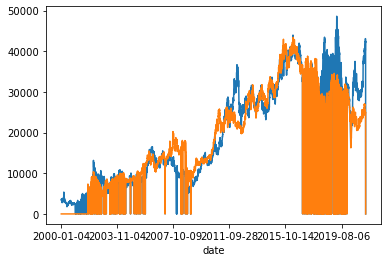

In [24]:
new_df[20000].plot()
new_df[35250].plot()

### 잠재요인 협업 필터링 (Surprise)

In [25]:
new_df

name,70,80,100,120,150,210,240,270,640,660,...,241560,241590,251270,267250,271560,282330,284740,285130,294870,316140
date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,0.0,3338.0,23510.0,0.0,20558.0,9641.0,35.0,6111.0,0.0,307182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,0.0,3097.0,23074.0,0.0,20789.0,8941.0,33.0,5778.0,0.0,275569.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,0.0,3105.0,21562.0,0.0,19557.0,8475.0,31.0,5529.0,0.0,261254.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-07,0.0,2957.0,22570.0,0.0,19980.0,8630.0,32.0,5404.0,0.0,258868.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-10,0.0,3179.0,22738.0,0.0,19826.0,8552.0,35.0,5653.0,0.0,256482.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-12,91300.0,36200.0,65800.0,178000.0,49500.0,84800.0,18450.0,84300.0,117000.0,137500.0,...,41150.0,19250.0,140000.0,56600.0,127500.0,163500.0,41950.0,263500.0,28450.0,10400.0
2021-04-13,91500.0,36100.0,65900.0,175000.0,49250.0,85200.0,18700.0,85500.0,114500.0,139500.0,...,41450.0,18550.0,138500.0,58700.0,127500.0,162000.0,42400.0,256797.0,27950.0,10350.0
2021-04-14,92700.0,35550.0,64600.0,176000.0,49900.0,89600.0,19000.0,86000.0,118000.0,137000.0,...,41550.0,18250.0,141500.0,59400.0,127500.0,162500.0,43900.0,277000.0,28500.0,10400.0


In [26]:
dfdf

,name,adj_close,date
0,70,74031,2011-12-05
1,70,72322,2011-12-06
2,70,75381,2011-12-07
3,70,71063,2011-12-08
4,70,68184,2011-12-09
...,...,...,...
807306,316140,10300,2021-04-09
807307,316140,10400,2021-04-12
807308,316140,10350,2021-04-13
807309,316140,10400,2021-04-14


In [27]:
from surprise import Reader, Dataset

reader = Reader(rating_scale=(0.5, 0.5))

In [28]:
from surprise.model_selection import train_test_split

data = Dataset.load_from_df(dfdf[["date", "name", "adj_close"]], reader)
trainset, testset = train_test_split(data, test_size=0.25, random_state=0)

In [29]:
from surprise import SVD
from surprise import accuracy
algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 199795.1625


199795.16245120796

#### 정리
index|알고리즘|결과(RMSE)|향후방향
---|---|---|---
1|NaiveBayes|10203.81835|추천알고리즘에 적합하지 않다고 판단(제거)
2|KNN|10646.62173|추천알고리즘에 적합하지 않다고 판단(제거)
3|PCA->KNN|11019.41044|추천알고리즘에 적합하지 않다고 판단(제거)
4|최근접이웃 협업 필터링(코사인유사도)||4개 알고리즘 가장 적합하다고 판단(향후 추가 분석 진행)
5|잠재요인 협업필터링(surprise)|199795.16245|추천알고리즘에 적합하지 않다고 판단(제거)